In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [11]:
column_types = {'device_model': 'str'}
df_access = pd.read_csv('access_point.csv', dtype=column_types)
df_doorbell = pd.read_csv('doorbell.csv', dtype=column_types)
df_laptop_7400 = pd.read_csv('laptop_7400.csv', dtype=column_types)
df_laptop_e64 = pd.read_csv('laptop_e64.csv', dtype=column_types)
df_lightbulb = pd.read_csv('lightbulb.csv', dtype=column_types)
df_samsung_web = pd.read_csv('samsung_web.csv', dtype=column_types)
df_smartphone_4 = pd.read_csv('smartphone_4.csv', dtype=column_types)
df_smartphone_5 = pd.read_csv('smartphone_5.csv', dtype=column_types)
df_socket = pd.read_csv('socket.csv', dtype=column_types)
df_speaker = pd.read_csv('speaker.csv', dtype=column_types)
df_streamer = pd.read_csv('streamer.csv', dtype=column_types)
df_webcam = pd.read_csv('webcam.csv', dtype=column_types)

df_2 = pd.concat([df_samsung_web, df_access, df_doorbell, df_laptop_7400, df_laptop_e64, df_lightbulb, df_smartphone_4, df_smartphone_5, df_socket, df_speaker, df_streamer, df_webcam], ignore_index=True)

nocolumns = ['IPV4_SRC_ADDR', 'MAC', 'IPV4_DST_ADDR', 'IP', 'partition', 'category', 'type', 'date']

df = df_2.drop(nocolumns, axis=1)

X = df.drop(columns='device_model', axis=1)
Y = df['device_model']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=0)

# Model architecture with dropout for regularization
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

accuracy = model.evaluate(X_test, y_test)[1]
print('Neural Network Accuracy: {:.2f}%'.format(accuracy * 100))

predictions = model.predict(X_test)
predictions_class = np.argmax(predictions, axis=1)
predictions_labels = label_encoder.inverse_transform(predictions_class)

Epoch 1/50
15653/15653 [==============================] - 141s 6ms/step - loss: 0.5086 - accuracy: 0.8158 - val_loss: 0.3144 - val_accuracy: 0.8644
Epoch 2/50
15653/15653 [==============================] - 96s 6ms/step - loss: 0.3393 - accuracy: 0.8611 - val_loss: 0.2890 - val_accuracy: 0.8703
Epoch 3/50
15653/15653 [==============================] - 104s 7ms/step - loss: 0.3086 - accuracy: 0.8674 - val_loss: 0.2727 - val_accuracy: 0.8737
Epoch 4/50
15653/15653 [==============================] - 100s 6ms/step - loss: 0.2945 - accuracy: 0.8704 - val_loss: 0.2570 - val_accuracy: 0.8807
Epoch 5/50
15653/15653 [==============================] - 101s 6ms/step - loss: 0.2783 - accuracy: 0.8739 - val_loss: 0.2385 - val_accuracy: 0.8864
Epoch 6/50
15653/15653 [==============================] - 98s 6ms/step - loss: 0.2624 - accuracy: 0.8799 - val_loss: 0.2255 - val_accuracy: 0.8917
Epoch 7/50
15653/15653 [==============================] - 96s 6ms/step - loss: 0.2530 - accuracy: 0.8841 - val_los

In [27]:
predictions_df = pd.DataFrame(predictions_labels, index=y_test, columns=['Predicted_Label'])

# Calculate metrics
accuracy_nn = accuracy_score(y_test, predictions_class)
precision_nn = precision_score(y_test, predictions_class, average='macro')
recall_nn = recall_score(y_test, predictions_class, average='macro')
f1_nn = f1_score(y_test, predictions_class, average='macro')

print('Neural Network Accuracy: {:.2f}%'.format(accuracy_nn * 100))
print('Neural Network Precision: {:.2f}%'.format(precision_nn*100))
print('Neural Network Recall: {:.2f}%'.format(recall_nn*100))
print('Neural Network F1 Score: {:.2f}%'.format(f1_nn*100))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network Accuracy: 95.73%
Neural Network Precision: 84.20%
Neural Network Recall: 80.22%
Neural Network F1 Score: 81.42%


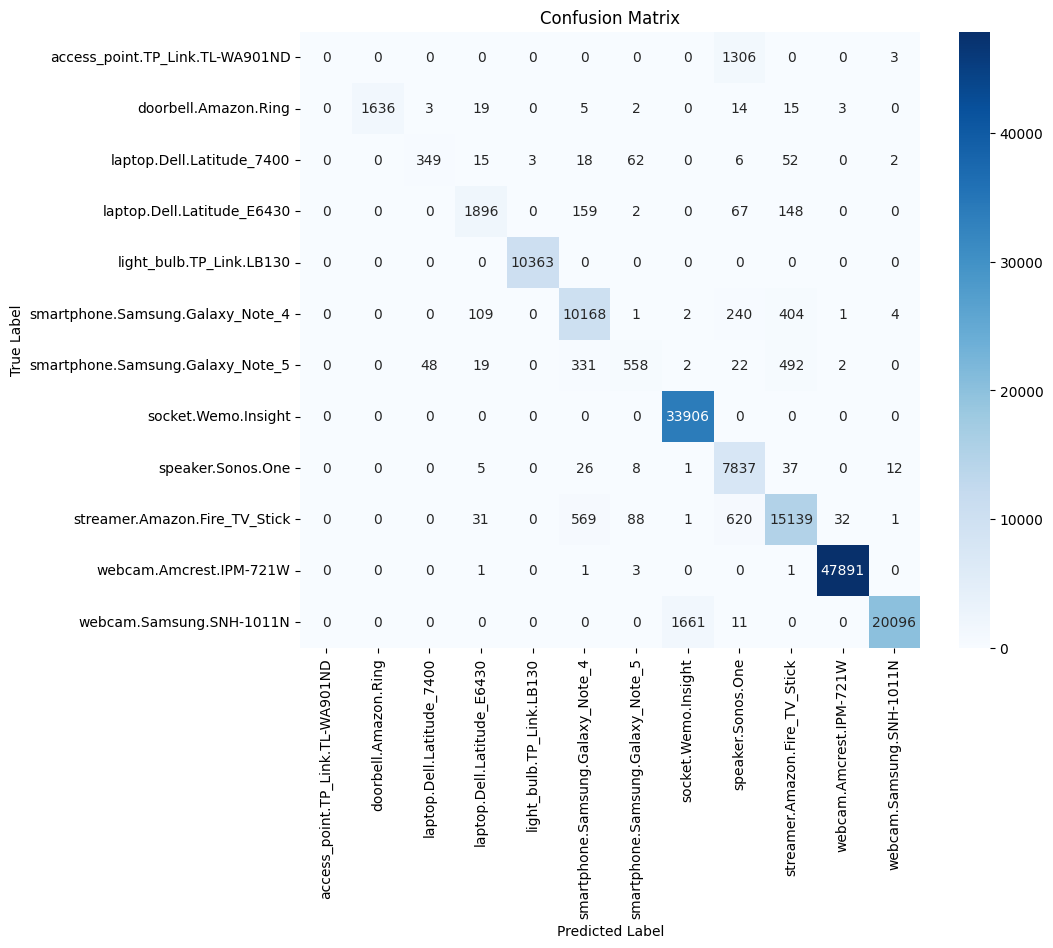

In [28]:
conf_matrix = confusion_matrix(y_test, predictions_class)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()